# Spark Memory Management

3 Main components in Spark Executor Container
1. On-heap memory
2. Off-heap memory
3. Overhead

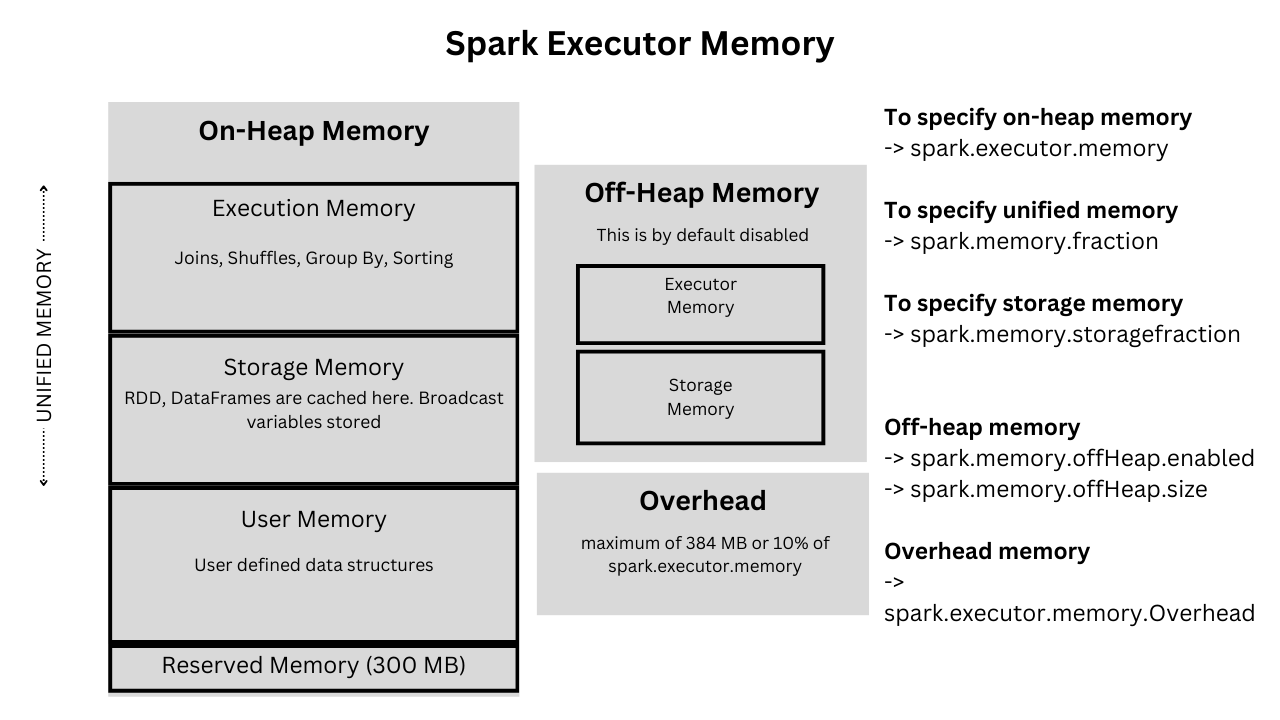

## 1. On-heap Memory (Managed by JVM)
- It is the total memory available to Spark
- Most of Spark's operations are run here by the JVM (VM which is used to run Spark)
- Pyspark is a wrapper around Java APIs of Spark, however the execution is done on the JVM

### 1.1. Unified Memory = Execution + Storage Memory
- The split between Execution and Storage is dynamic (post Spark 1.6)
- Priority is given to execution
    - In case if storage  memory has some free space and execution needs memory then it can just occupy it
    - However, if event storage is full then some of it's memory wil be **evicted** based on the Least Recently Used LRU algorithm
#### I. Execution Memory
- It used for computation such as shuffles, joins, group by etc
- Dynamically adjusts based on workload
- Cannot be evicted by Storage
#### II. Storage Memory
- Stores the cached data and broadcast variables
- Can be evicted based on LRU (Least Recently Used) policy


### 1.2. User Memory
- Here the user variables, objects and UDF (user defined functions) are stored

### 1.3. Reserved Memory
- By default it is 300 MB
- Spark needs this to run itself and store it's internal objects

## 2. Off-heap Memory
- When the On-heap memory is full -> Garbage Collection(GC) starts. GC cycles will pause all other operations on on-heap memory.
- So this is when off-heap memory can come into picture
- It is the memory allocated outside the JVM heap (10-20% of spark.executor.memory)
- Managed directly by the operating system
- Slower than on-heap

### 2.1. Use Cases
- large shuffle operations
- memory intensive operations

## 3. Overhead Memory
- As the name suggests it is the extra memory allocated above the specified executor memory
- critical for preventing OOM
- Used for JVM internals, native libraries, and thread 

### 3.1. Components of Overhead memory
- JVM Overhead
- PySpark Overhead - Python intrepreter memory
- Network Overhead